## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CUDA Availability
Check if there are any available CUDA GPU devices.

In [ ]:
### Check CUDA devices exist
import torch
print("Is CUDA available", torch.cuda.is_available())
print("Cuda device count is ",torch.cuda.device_count())
print("Current CUDA device is", torch.cuda.current_device())

Is CUDA available True
Cuda device count is  1
Current CUDA device is 0


 **requires** a GPU. If there are no CUDA Available GPUs, you can always run the notebook on colab and use a free GPU by selecting:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

## Install DECA model

### Install DECA model repo

In [ ]:
### Install DECA model repo
!git clone https://github.com/Maazasim1/DECA
%cd DECA

fatal: destination path 'DECA' already exists and is not an empty directory.
/content/DECA


In [ ]:
!rm -rf TestSamples/exp/

In [ ]:
!mkdir TestSamples/exp/

In [ ]:
!pip install -r requirements.txt

  Using cached chumpy-0.70.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
flame_model = '/content/drive/MyDrive/voca/FLAME2020.zip'
#!unzip [flame_model] -d /content/sample_data/
!unzip /content/drive/MyDrive/voca/FLAME2020.zip -d /content/sample_data/
!cp /content/sample_data/generic_model.pkl /content/DECA/data/

Archive:  /content/drive/MyDrive/voca/FLAME2020.zip
  inflating: /content/sample_data/female_model.pkl  
  inflating: /content/sample_data/generic_model.pkl  
  inflating: /content/sample_data/male_model.pkl  
  inflating: /content/sample_data/Readme.pdf  


### Download DECA trained model
If it does not download automatically, then manually download it and place it under /content/DECA/data

In [ ]:
!pip install gdown
import gdown
try:
  deca_url = 'https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje'
  output = '/content/DECA/data/deca_model.tar'
  gdown.download(deca_url, output, quiet=False)
except:
  os.system("!cp /content/drive/MyDrive/deca/dea_model.tar /content/DECA/data/")

Downloading...
From (original): https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje
From (redirected): https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje&confirm=t&uuid=a32b4471-da22-411f-b7fd-e3cdaea7bd56
To: /content/DECA/data/deca_model.tar
100%|██████████| 434M/434M [00:07<00:00, 56.8MB/s]


### Get the npy file to enable textured 3D avatar generation

In [ ]:
%cd /content/
# !pip install numpy==1.18.5
# !pip install h5py==3.1.0
# !pip install chumpy==0.70
!pip install git+https://github.com/mattloper/chumpy@9b045ff5d6588a24a0bab52c83f032e2ba433e17 #chumpy
# !pip install opencv-python==4.4.0.46
!git clone https://github.com/TimoBolkart/BFM_to_FLAME.git

/content
  Cloning https://github.com/mattloper/chumpy (to revision 9b045ff5d6588a24a0bab52c83f032e2ba433e17) to /tmp/pip-req-build-fqbupyh9
  Running command git clone --filter=blob:none --quiet https://github.com/mattloper/chumpy /tmp/pip-req-build-fqbupyh9
  Running command git rev-parse -q --verify 'sha^9b045ff5d6588a24a0bab52c83f032e2ba433e17'
  Running command git fetch -q https://github.com/mattloper/chumpy 9b045ff5d6588a24a0bab52c83f032e2ba433e17
  Running command git checkout -q 9b045ff5d6588a24a0bab52c83f032e2ba433e17
  Resolved https://github.com/mattloper/chumpy to commit 9b045ff5d6588a24a0bab52c83f032e2ba433e17
  Preparing metadata (setup.py) ... done
  Created wheel for chumpy: filename=chumpy-0.72-py3-none-any.whl size=60913 sha256=602d8bce6a53da59bae85817ca4e2d82608fb068871a35b5222c85d3dd681009
  Stored in directory: /root/.cache/pip/wheels/f3/63/49/b19aea62cd7ebdef632ab393a7b2072f991116d4fc5f8da980
Successfully built chumpy
  Attempting uninstall: chumpy
    Found exis

In [ ]:
!wget -O /content/BFM_to_FLAME/data/mask_inpainting.npz http://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz

--2025-02-10 21:27:06--  http://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz
Resolving files.is.tue.mpg.de (files.is.tue.mpg.de)... 192.124.27.148
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz [following]
--2025-02-10 21:27:07--  https://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78643654 (75M) [application/octet-stream]
Saving to: ‘/content/BFM_to_FLAME/data/mask_inpainting.npz’

/content/BFM_to_FLA 100%[===================>]  75.00M  20.5MB/s    in 4.6s    

2025-02-10 21:27:12 (16.3 MB/s) - ‘/content/BFM_to_FLAME/data/mask_inpainting.npz’ saved [78643654/78643654]



Download BFM 2017 model (i.e. 'model2017-1_bfm_nomouth.h5') [here](https://faces.dmi.unibas.ch/bfm/bfm2017.html) and place it under **/content/BFM_to_FLAME/model**

In [ ]:
%cd /content/BFM_to_FLAME/
!cp /content/drive/MyDrive/model2017-1_bfm_nomouth.h5 /content/BFM_to_FLAME/model/model2017-1_bfm_nomouth.h5
!python col_to_tex.py

/content/BFM_to_FLAME
Conversion started......
Conversion finished


In [ ]:
!cp /content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz /content/drive/MyDrive/FLAME_albedo_from_BFM.npz #store it also in Google Drive (for quick retrieval)
!cp /content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz /content/DECA/data/FLAME_albedo_from_BFM.npz

## Demo Time
Reconstruct the 3D avatar from a number of sample images. You can produce the 3D mesh either texture or untextured (depending on the texture flag). Specifically given a 2D image, we visualize the predicted 2D landmanks, 3D landmarks (red means non-visible points), coarse geometry, detailed geometry, and depth. Transfer also expressions from a face image to a target avatar mesh.



### Reconstruct Demo examples

In [ ]:
!ninja --version

In [ ]:
%cd /content/DECA/

/content/DECA


In [ ]:
%cd /content/DECA/
!python demos/demo_reconstruct.py -i TestSamples/examples --saveDepth True --saveObj True

In [ ]:
!gcc --version

### Personalized 3Dreconstruction from single image:

Select an image and place it under your custom directory (e.g my_examples) to produce the 3D avatar meshes. All images under the directory, will be reconstructed in 3D. Here we use images of both real and synthetic people in our test samples.

**--> Replace dropobox link with your image dropbox link**

In [ ]:
!sudo apt install wget
!mkdir /content/DECA/TestSamples/my_examples # make folder
#you can even manually drag and drop images to this folder
#or just transfer from the internet
!wget -O /content/DECA/TestSamples/my_examples/synthetic.png "https://www.dropbox.com/s/l1ioo2hf3gu397g/avatar_1.jpg?dl=1" #change dropbox link frmo dl=0 to dl=1
# !wget -O /content/DECA/TestSamples/my_examples/real_test.png "https://www.dropbox.com/s/c4l0jm6w0hcxfpb/ronaldo_nazario.jpg?dl=1" # "https://www.dropbox.com/s/9tq8ipsgbgqaljw/anna.png?dl=1" #"https://www.dropbox.com/s/cdcvx8btnw8z1ga/chris.jpg?dl=1" # replace here your photo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
mkdir: cannot create directory ‘/content/DECA/TestSamples/my_examples’: File exists
--2025-02-10 21:45:45--  https://www.dropbox.com/s/l1ioo2hf3gu397g/avatar_1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/i8vohfiej7acb4by7afuh/avatar_1.jpg?rlkey=efd51ceb4smfb6fambp3wzwcb&dl=1 [following]
--2025-02-10 21:45:45--  https://www.dropbox.com/scl/fi/i8vohfiej7acb4by7afuh/avatar_1.jpg?rlkey=efd51ceb4smfb6fambp3wzwcb&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8d0b310a0b99bb10fd1d

#### Resize images for better 3D reconstruction (Method)

In [ ]:
## Resize images
!pip install opencv-python
import cv2
def resize_image(img_path, width=224, height=224):

  img = cv2.imread(img_path) #, cv2.IMREAD_UNCHANGED)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized

In [ ]:
### Resize all images in the root directory
import os
root_path = "/content/DECA/TestSamples/my_examples/"
for files in os.listdir(root_path):
  fullpath = os.path.join(root_path, files)
  try:
    resized = resize_image(fullpath) #resize each image file
    cv2.imwrite(fullpath, resized)
  except:
    print("Could not resize image at", fullpath)


Could not resize image at /content/DECA/TestSamples/my_examples/.ipynb_checkpoints
Could not resize image at /content/DECA/TestSamples/my_examples/results


In [ ]:
!pip install numpy<2

/bin/bash: line 1: 2: No such file or directory


#### **3D reconstruction of avatar face from custom face images**:


Results are stored under /content/DECA/TestSamples/my_examples/results

In [ ]:
!rm -rf /content/DECA/TestSamples/my_examples/results

In [ ]:
### 3D reconstruction of custom face to avatar mesh
!python demos/demo_reconstruct.py -i TestSamples/my_examples --savefolder TestSamples/my_examples/results \
--saveDepth True --saveObj True --useTex True

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100% 85.7M/85.7M [00:05<00:00, 15.9MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100% 91.9M/91.9M [00:05<00:00, 16.9MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
100% 1/1 [00:28<00:00, 28.96s/it]


In [ ]:
### Visualize some results
from google.colab.patches import cv2_imshow
def show_img(path):
  img = cv2.imread(path)
  cv2_imshow(img)

path1 = "/content/DECA/TestSamples/my_examples/results/synthetic_vis.jpg"
path11 = "/content/DECA/TestSamples/my_examples/results/synthetic_vis_original_size.jpg"
path2 = '/content/DECA/TestSamples/my_examples/results/real_test_vis.jpg'
path22 = "/content/DECA/TestSamples/my_examples/results/real_test_vis_original_size.jpg"
show_img(path11)
show_img(path22)

AttributeError: 'NoneType' object has no attribute 'clip'

#### Fix bug, to succesfully save .obj file

In [ ]:
%%writefile /content/DECA/decalib/deca.py
# -*- coding: utf-8 -*-
#
# Max-Planck-Gesellschaft zur Förderung der Wissenschaften e.V. (MPG) is
# holder of all proprietary rights on this computer program.
# Using this computer program means that you agree to the terms
# in the LICENSE file included with this software distribution.
# Any use not explicitly granted by the LICENSE is prohibited.
#
# Copyright©2019 Max-Planck-Gesellschaft zur Förderung
# der Wissenschaften e.V. (MPG). acting on behalf of its Max Planck Institute
# for Intelligent Systems. All rights reserved.
#
# For comments or questions, please email us at deca@tue.mpg.de
# For commercial licensing contact, please contact ps-license@tuebingen.mpg.de

import os, sys
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn

import numpy as np
from time import time
from skimage.io import imread
import cv2
import pickle
from .utils.renderer import SRenderY, set_rasterizer
from .models.encoders import ResnetEncoder
from .models.FLAME import FLAME, FLAMETex
from .models.decoders import Generator
from .utils import util
from .utils.rotation_converter import batch_euler2axis
from .utils.tensor_cropper import transform_points
from .datasets import datasets
from .utils.config import cfg
torch.backends.cudnn.benchmark = True

class DECA(nn.Module):
    def __init__(self, config=None, device='cuda'):
        super(DECA, self).__init__()
        if config is None:
            self.cfg = cfg
        else:
            self.cfg = config
        self.device = device
        self.image_size = self.cfg.dataset.image_size
        self.uv_size = self.cfg.model.uv_size

        self._create_model(self.cfg.model)
        self._setup_renderer(self.cfg.model)

    def _setup_renderer(self, model_cfg):
        set_rasterizer(self.cfg.rasterizer_type)
        self.render = SRenderY(self.image_size, obj_filename=model_cfg.topology_path, uv_size=model_cfg.uv_size, rasterizer_type=self.cfg.rasterizer_type).to(self.device)
        # face mask for rendering details
        mask = imread(model_cfg.face_eye_mask_path).astype(np.float32)/255.; mask = torch.from_numpy(mask[:,:,0])[None,None,:,:].contiguous()
        self.uv_face_eye_mask = F.interpolate(mask, [model_cfg.uv_size, model_cfg.uv_size]).to(self.device)
        mask = imread(model_cfg.face_mask_path).astype(np.float32)/255.; mask = torch.from_numpy(mask[:,:,0])[None,None,:,:].contiguous()
        self.uv_face_mask = F.interpolate(mask, [model_cfg.uv_size, model_cfg.uv_size]).to(self.device)
        # displacement correction
        fixed_dis = np.load(model_cfg.fixed_displacement_path)
        self.fixed_uv_dis = torch.tensor(fixed_dis).float().to(self.device)
        # mean texture
        mean_texture = imread(model_cfg.mean_tex_path).astype(np.float32)/255.; mean_texture = torch.from_numpy(mean_texture.transpose(2,0,1))[None,:,:,:].contiguous()
        self.mean_texture = F.interpolate(mean_texture, [model_cfg.uv_size, model_cfg.uv_size]).to(self.device)
        # dense mesh template, for save detail mesh
        self.dense_template = np.load(model_cfg.dense_template_path, allow_pickle=True, encoding='latin1').item()

    def _create_model(self, model_cfg):
        # set up parameters
        self.n_param = model_cfg.n_shape+model_cfg.n_tex+model_cfg.n_exp+model_cfg.n_pose+model_cfg.n_cam+model_cfg.n_light
        self.n_detail = model_cfg.n_detail
        self.n_cond = model_cfg.n_exp + 3 # exp + jaw pose
        self.num_list = [model_cfg.n_shape, model_cfg.n_tex, model_cfg.n_exp, model_cfg.n_pose, model_cfg.n_cam, model_cfg.n_light]
        self.param_dict = {i:model_cfg.get('n_' + i) for i in model_cfg.param_list}

        # encoders
        self.E_flame = ResnetEncoder(outsize=self.n_param).to(self.device)
        self.E_detail = ResnetEncoder(outsize=self.n_detail).to(self.device)
        # decoders
        self.flame = FLAME(model_cfg).to(self.device)
        if model_cfg.use_tex:
            self.flametex = FLAMETex(model_cfg).to(self.device)
        self.D_detail = Generator(latent_dim=self.n_detail+self.n_cond, out_channels=1, out_scale=model_cfg.max_z, sample_mode = 'bilinear').to(self.device)
        # resume model
        model_path = self.cfg.pretrained_modelpath
        if os.path.exists(model_path):
            print(f'trained model found. load {model_path}')
            checkpoint = torch.load(model_path)
            self.checkpoint = checkpoint
            util.copy_state_dict(self.E_flame.state_dict(), checkpoint['E_flame'])
            util.copy_state_dict(self.E_detail.state_dict(), checkpoint['E_detail'])
            util.copy_state_dict(self.D_detail.state_dict(), checkpoint['D_detail'])
        else:
            print(f'please check model path: {model_path}')
            # exit()
        # eval mode
        self.E_flame.eval()
        self.E_detail.eval()
        self.D_detail.eval()

    def decompose_code(self, code, num_dict):
        ''' Convert a flattened parameter vector to a dictionary of parameters
        code_dict.keys() = ['shape', 'tex', 'exp', 'pose', 'cam', 'light']
        '''
        code_dict = {}
        start = 0
        for key in num_dict:
            end = start+int(num_dict[key])
            code_dict[key] = code[:, start:end]
            start = end
            if key == 'light':
                code_dict[key] = code_dict[key].reshape(code_dict[key].shape[0], 9, 3)
        return code_dict

    def displacement2normal(self, uv_z, coarse_verts, coarse_normals):
        ''' Convert displacement map into detail normal map
        '''
        batch_size = uv_z.shape[0]
        uv_coarse_vertices = self.render.world2uv(coarse_verts).detach()
        uv_coarse_normals = self.render.world2uv(coarse_normals).detach()

        uv_z = uv_z*self.uv_face_eye_mask
        uv_detail_vertices = uv_coarse_vertices + uv_z*uv_coarse_normals + self.fixed_uv_dis[None,None,:,:]*uv_coarse_normals.detach()
        dense_vertices = uv_detail_vertices.permute(0,2,3,1).reshape([batch_size, -1, 3])
        uv_detail_normals = util.vertex_normals(dense_vertices, self.render.dense_faces.expand(batch_size, -1, -1))
        uv_detail_normals = uv_detail_normals.reshape([batch_size, uv_coarse_vertices.shape[2], uv_coarse_vertices.shape[3], 3]).permute(0,3,1,2)
        uv_detail_normals = uv_detail_normals*self.uv_face_eye_mask + uv_coarse_normals*(1-self.uv_face_eye_mask)
        return uv_detail_normals

    def visofp(self, normals):
        ''' visibility of keypoints, based on the normal direction
        '''
        normals68 = self.flame.seletec_3d68(normals)
        vis68 = (normals68[:,:,2:] < 0.1).float()
        return vis68

    # @torch.no_grad()
    def encode(self, images, use_detail=True):
        if use_detail:
            # use_detail is for training detail model, need to set coarse model as eval mode
            with torch.no_grad():
                parameters = self.E_flame(images)
        else:
            parameters = self.E_flame(images)
        codedict = self.decompose_code(parameters, self.param_dict)
        codedict['images'] = images
        if use_detail:
            detailcode = self.E_detail(images)
            codedict['detail'] = detailcode
        if self.cfg.model.jaw_type == 'euler':
            posecode = codedict['pose']
            euler_jaw_pose = posecode[:,3:].clone() # x for yaw (open mouth), y for pitch (left ang right), z for roll
            posecode[:,3:] = batch_euler2axis(euler_jaw_pose)
            codedict['pose'] = posecode
            codedict['euler_jaw_pose'] = euler_jaw_pose
        return codedict

    # @torch.no_grad()
    def decode(self, codedict, rendering=True, iddict=None, vis_lmk=True, return_vis=True, use_detail=True,
                render_orig=False, original_image=None, tform=None):
        images = codedict['images']
        batch_size = images.shape[0]

        ## decode
        verts, landmarks2d, landmarks3d = self.flame(shape_params=codedict['shape'], expression_params=codedict['exp'], pose_params=codedict['pose'])
        if self.cfg.model.use_tex:
            albedo = self.flametex(codedict['tex'])
        else:
            albedo = torch.zeros([batch_size, 3, self.uv_size, self.uv_size], device=images.device)
        landmarks3d_world = landmarks3d.clone()

        ## projection
        landmarks2d = util.batch_orth_proj(landmarks2d, codedict['cam'])[:,:,:2]; landmarks2d[:,:,1:] = -landmarks2d[:,:,1:]#; landmarks2d = landmarks2d*self.image_size/2 + self.image_size/2
        landmarks3d = util.batch_orth_proj(landmarks3d, codedict['cam']); landmarks3d[:,:,1:] = -landmarks3d[:,:,1:] #; landmarks3d = landmarks3d*self.image_size/2 + self.image_size/2
        trans_verts = util.batch_orth_proj(verts, codedict['cam']); trans_verts[:,:,1:] = -trans_verts[:,:,1:]
        opdict = {
            'verts': verts,
            'trans_verts': trans_verts,
            'landmarks2d': landmarks2d,
            'landmarks3d': landmarks3d,
            'landmarks3d_world': landmarks3d_world,
        }

        ## rendering
        if rendering:
            ops = self.render(verts, trans_verts, albedo, codedict['light'])
            ## output
            opdict['grid'] = ops['grid']
            opdict['rendered_images'] = ops['images']
            opdict['alpha_images'] = ops['alpha_images']
            opdict['normal_images'] = ops['normal_images']

        if self.cfg.model.use_tex:
            opdict['albedo'] = albedo

        if use_detail:
            uv_z = self.D_detail(torch.cat([codedict['pose'][:,3:], codedict['exp'], codedict['detail']], dim=1))
            if iddict is not None:
                uv_z = self.D_detail(torch.cat([iddict['pose'][:,3:], iddict['exp'], codedict['detail']], dim=1))
            uv_detail_normals = self.displacement2normal(uv_z, verts, ops['normals'])
            uv_shading = self.render.add_SHlight(uv_detail_normals, codedict['light'])
            uv_texture = albedo*uv_shading

            opdict['uv_texture'] = uv_texture
            opdict['normals'] = ops['normals']
            opdict['uv_detail_normals'] = uv_detail_normals
            opdict['displacement_map'] = uv_z+self.fixed_uv_dis[None,None,:,:]

        if vis_lmk:
            landmarks3d_vis = self.visofp(ops['transformed_normals'])#/self.image_size
            landmarks3d = torch.cat([landmarks3d, landmarks3d_vis], dim=2)
            opdict['landmarks3d'] = landmarks3d

        if return_vis:
            if render_orig and original_image is not None and tform is not None:
                points_scale = [self.image_size, self.image_size]
                _, _, h, w = original_image.shape
                # import ipdb; ipdb.set_trace()
                trans_verts = transform_points(trans_verts, tform, points_scale, [h, w])
                landmarks2d = transform_points(landmarks2d, tform, points_scale, [h, w])
                landmarks3d = transform_points(landmarks3d, tform, points_scale, [h, w])
                background = original_image
                images = original_image
            else:
                h, w = self.image_size, self.image_size
                background = None
            ## render shape
            shape_images, _, grid, alpha_images = self.render.render_shape(verts, trans_verts, h=h, w=w, images=background, return_grid=True)
            detail_normal_images = F.grid_sample(uv_detail_normals, grid, align_corners=False)*alpha_images
            shape_detail_images = self.render.render_shape(verts, trans_verts, detail_normal_images=detail_normal_images, h=h, w=w, images=background)

            ## extract texture
            ## TODO: current resolution 256x256, support higher resolution, and add visibility
            uv_pverts = self.render.world2uv(trans_verts)
            uv_gt = F.grid_sample(images, uv_pverts.permute(0,2,3,1)[:,:,:,:2], mode='bilinear')
            if self.cfg.model.use_tex:
                ## TODO: poisson blending should give better-looking results
                uv_texture_gt = uv_gt[:,:3,:,:]*self.uv_face_eye_mask + (uv_texture[:,:3,:,:]*(1-self.uv_face_eye_mask))
            else:
                uv_texture_gt = uv_gt[:,:3,:,:]*self.uv_face_eye_mask + (torch.ones_like(uv_gt[:,:3,:,:])*(1-self.uv_face_eye_mask)*0.7)

            opdict['uv_texture_gt'] = uv_texture_gt
            visdict = {
                'inputs': images,
                'landmarks2d': util.tensor_vis_landmarks(images, landmarks2d),
                'landmarks3d': util.tensor_vis_landmarks(images, landmarks3d),
                'shape_images': shape_images,
                'shape_detail_images': shape_detail_images
            }
            if self.cfg.model.use_tex:
                visdict['rendered_images'] = ops['images']

            return opdict, visdict

        else:
            return opdict

    def visualize(self, visdict, size=224, dim=2):
        '''
        image range should be [0,1]
        dim: 2 for horizontal. 1 for vertical
        '''
        assert dim == 1 or dim==2
        grids = {}
        for key in visdict:
            _,_,h,w = visdict[key].shape
            if dim == 2:
                new_h = size; new_w = int(w*size/h)
            elif dim == 1:
                new_h = int(h*size/w); new_w = size
            grids[key] = torchvision.utils.make_grid(F.interpolate(visdict[key], [new_h, new_w]).detach().cpu())
        grid = torch.cat(list(grids.values()), dim)
        grid_image = (grid.numpy().transpose(1,2,0).copy()*255)[:,:,[2,1,0]]
        grid_image = np.minimum(np.maximum(grid_image, 0), 255).astype(np.uint8)
        return grid_image

    def save_obj(self, filename, opdict):
        '''
        vertices: [nv, 3], tensor
        texture: [3, h, w], tensor
        '''
        i = 0
        vertices = opdict['verts'][i].cpu().numpy()
        faces = self.render.faces[0].cpu().numpy()
        texture = util.tensor2image(opdict['uv_texture_gt'][i])
        uvcoords = self.render.raw_uvcoords[0].cpu().numpy()
        uvfaces = self.render.uvfaces[0].cpu().numpy()
        # save coarse mesh, with texture and normal map
        normal_map = util.tensor2image(opdict['uv_detail_normals'][i]*0.5 + 0.5)
        util.write_obj(filename, vertices, faces,
                        texture=texture,
                        uvcoords=uvcoords,
                        uvfaces=uvfaces,
                        normal_map=normal_map)
        # upsample mesh, save detailed mesh
        texture = texture[:,:,[2,1,0]]
        normals = opdict['normals'][i].cpu().numpy()
        try:
          displacement_map = opdict['displacement_map'][i].cpu().numpy().squeeze()
        except:
          print("Cannot call numpy on Tensor that requires Grad. Hence just detach it")
          displacement_map = opdict['displacement_map'][i].cpu().detach().numpy().squeeze()
        dense_vertices, dense_colors, dense_faces = util.upsample_mesh(vertices, normals, faces, displacement_map, texture, self.dense_template)
        util.write_obj(filename.replace('.obj', '_detail.obj'),
                        dense_vertices,
                        dense_faces,
                        colors = dense_colors,
                        inverse_face_order=True)

    def run(self, imagepath, iscrop=True):
        ''' An api for running deca given an image path
        '''
        testdata = datasets.TestData(imagepath)
        images = testdata[0]['image'].to(self.device)[None,...]
        codedict = self.encode(images)
        opdict, visdict = self.decode(codedict)
        return codedict, opdict, visdict

    def model_dict(self):
        return {
            'E_flame': self.E_flame.state_dict(),
            'E_detail': self.E_detail.state_dict(),
            'D_detail': self.D_detail.state_dict()
        }


Overwriting /content/DECA/decalib/deca.py


### **Expression transfer from another image (2D image of face with desired expression) to the 3D generated avatar**
Specify the path to the image of the face of the targt 3D generated avatar. Also specify the path for the image, that changes the expression of the target avatar. All results for expression transfer are stored under /content/DECA/TestSamples/expression_transfer.
The source expressions can be found under  /content/DECA/TestSamples/exp

In [ ]:
### Expression transfer from source image to target 3D avatar
!python demos/demo_transfer.py --rasterizer_type "standard" \
--image_path "TestSamples/my_examples/real_test.png" \
--exp_path "TestSamples/my_examples/synthetic.png"  --savefolder 'TestSamples/expression_transfer' \
--saveObj False --useTex False --saveImages True #--saveDepth True --useTex True #--saveObj True
#you can try "pytorch3d" as a rasterizer step, if you have downloaded it

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_s

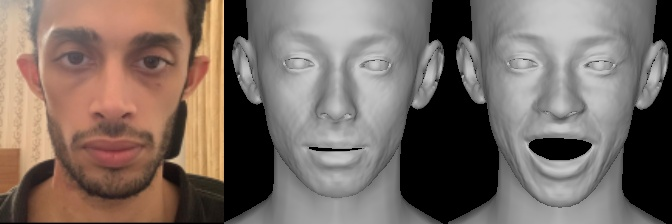

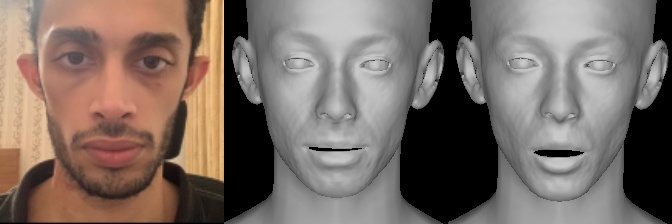

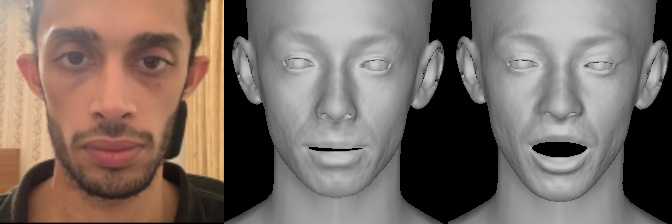

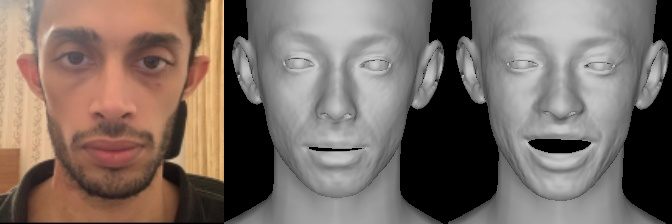

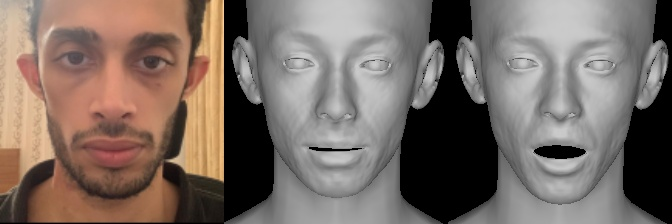

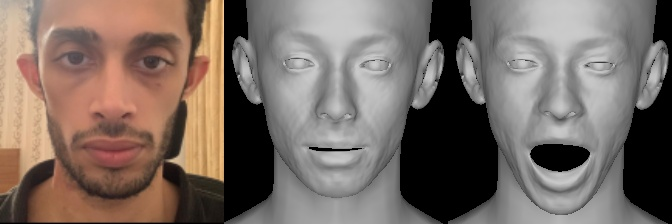

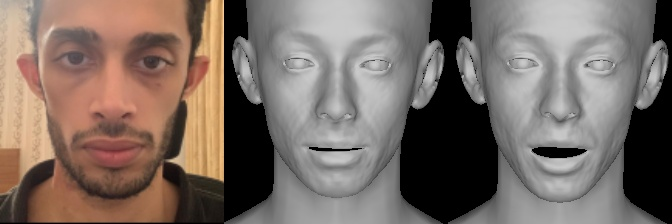

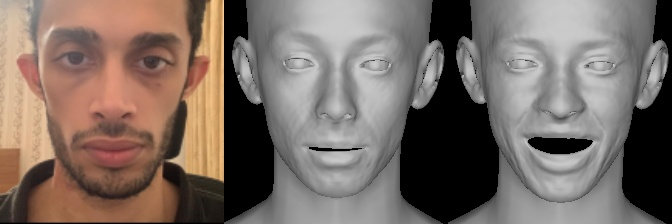

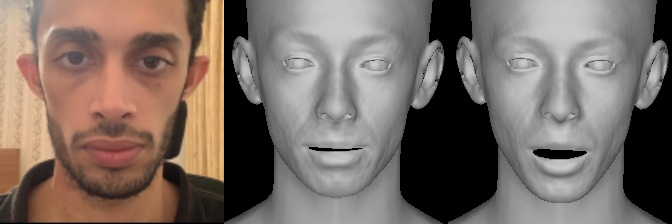

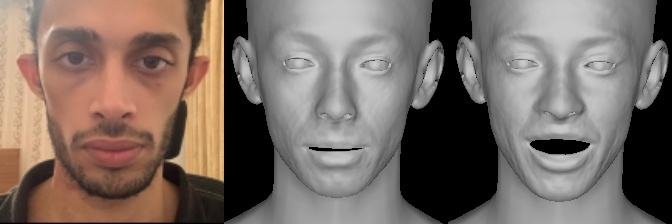

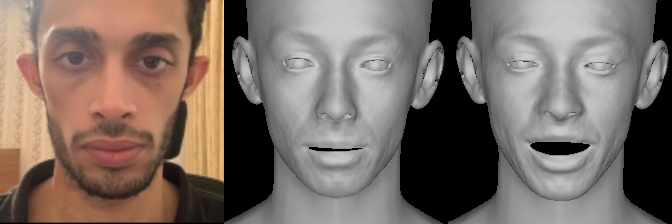

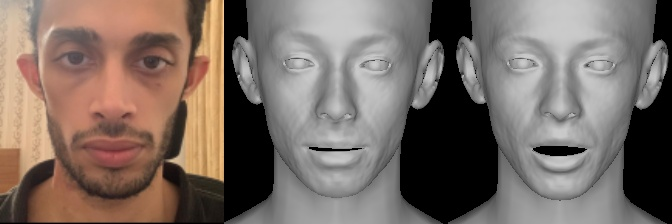

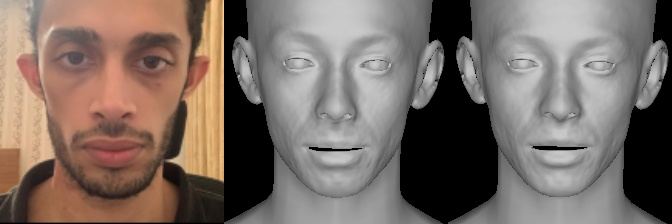

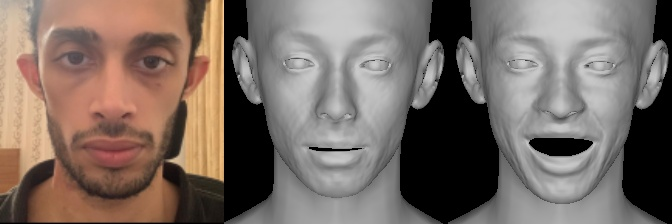

In [ ]:
### Expression transfer for a variety of expressions
source_image = "TestSamples/my_examples/real_test.png"
save_folder = "TestSamples/expression_transfer"
root = "/content/DECA/"
expression_root = "/content/DECA/TestSamples/exp"
for exp in os.listdir(expression_root):
  target_expression = os.path.join(expression_root, exp)
  output_folder = os.path.join(save_folder, str(exp.split('.')[0]))
  #print("Target expresion ---> ", target_expression)
  cmd = 'python demos/demo_transfer.py  --image_path %s --exp_path %s  --savefolder %s ' \
  '--saveDepth True --saveObj True --useTex True '%(source_image, target_expression,output_folder)
  os.system(cmd)
  try:
    #pic_path = os.path.join(output_folder, str(source_image.split('/')[-1]))
    pic_path = os.path.join(root+"/",output_folder, str(source_image.split('/')[-1]).split('.')[0]+"_animation.jpg")
    show_img(pic_path)
  except:
    #print('Could not find', pic_path)
    pass


### Save & Download results locally

In [ ]:
!zip   -r /content/mesh.zip /content/DECA/TestSamples/my_examples/results/ # 3d reconstruction
!zip   -r /content/expression.zip /content/DECA/TestSamples/expression_transfer/  # expression transfer

In [ ]:
from google.colab import files
files.download("/content/mesh.zip")
files.download("/content/expression.zip")

### Save in GoogleDrive

In [ ]:
### Create DECA folder in Gdrive if it does not exist
import os
import random
import datetime
deca_gpath = "/content/drive/MyDrive/deca"
if os.path.exists(deca_gpath):
  print("Folder exists")
else:
  cmd = 'mkdir /content/drive/MyDrive/deca'
  os.system(cmd)

#os.makedirs('/content/drive/MyDrive/deca', exists=True)

x = datetime.datetime.now()
dest_folder = str(x).split(' ')[0].replace("-", "_") + "_" + str(random.randrange(0,10))
cmd = "cp -r %s/. %s"%("/content/DECA/TestSamples/my_examples/results", os.path.join(deca_gpath, dest_folder))
os.system(cmd)


In [ ]:
### Save also expression results
deca_gpath = "/content/drive/MyDrive/deca"
dest_folder = str(x).split(' ')[0].replace("-", "_") + "_expression_" + str(random.randrange(0,10))
cmd = "cp -r %s/. %s"%("/content/DECA/TestSamples/expression_transfer", os.path.join(deca_gpath, dest_folder))
os.system(cmd)

### Visualization

#### Install pytorch 3D and import modules

In [ ]:
import os
import sys
import torch
need_pytorch3d=True
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.11.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

In [ ]:
import os
import torch
import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    DirectionalLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

# add path for demo utils functions
import sys
import os
sys.path.append(os.path.abspath(''))

In [ ]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

#### Visualize mesh file & texture map (.obj)
This is along the lines of the official Pytorch 3D tutorials.


Select path to .obj file. **Make sure that the respective .mtl file is in the same directory**

In [ ]:
#verts, faces, aux = load_obj(')
obj_filename = '/content/DECA/TestSamples/my_examples/results/real_test/real_test.obj'
device = torch.device("cuda:0")
mesh = load_objs_as_meshes([obj_filename], device=device)

Display texture map

In [ ]:
plt.figure(figsize=(7,7))
texture_image=mesh.textures.maps_padded()
plt.imshow(texture_image.squeeze().cpu().numpy())
plt.axis("off");

Setup renderer and its parameters (lightning, extrinsic parameters)

In [ ]:
# Initialize a camera.
# With world coordinates +Y close or far away, +X up and down and +Z tilted in front or back, the front of the face is facing the Z direction.
# So we move the camera by 180 in the azimuth direction so it is facing the front of the cow.
R, T = look_at_view_transform(0.6, 5, 0)  # (y, X, z)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 1024x1024. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. We also set bin_size and max_faces_per_bin to None which ensure that
# the faster coarse-to-fine rasterization method is used. Refer to rasterize_meshes.py for
# explanations of these parameters. Refer to docs/notes/renderer.md for an explanation of
# the difference between naive and coarse-to-fine rasterization.
raster_settings = RasterizationSettings(
    image_size=1024,
    blur_radius=0.0,
    faces_per_pixel=10,
)

# Place a point light in front of the object. As mentioned above, the front of the face avatar is facing the
# z direction.
lights = PointLights(device=device, location=[[0, 1, 5]])

# Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will
# interpolate the texture uv coordinates for each vertex, sample from a texture image and
# apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras,
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device,
        cameras=cameras,
        lights=lights
    )
)

In [ ]:
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");

### Visualize different expressions

In [ ]:
expressions_path = "/content/DECA/TestSamples/expression_transfer"

for exp in os.listdir(expressions_path):
  obj_filename = os.path.join(os.path.join(expressions_path, exp), "real_test/animation/real_test.obj")
  #verts, faces, aux = load_obj(')
  device = torch.device("cuda:0")
  try:
    mesh = load_objs_as_meshes([obj_filename], device=device)
    images = renderer(mesh)
    plt.figure(figsize=(8, 8))
    plt.imshow(images[0, ..., :3].cpu().numpy())
    plt.axis("off");
  except:
    print("Could not find", obj_filename)


In [ ]:
!unzip TestSamples/my_examples.zip -d TestSamples/my_examples
!unzip TestSamples/expression_transfer.zip -d TestSamples/expression_transfer

In [ ]:
!pip install trimesh pygltflib

In [ ]:
import os
import trimesh
import numpy as np
from pygltflib import GLTF2, Buffer, Mesh, Accessor, Node, Material, TextureInfo, BufferView


def load_mtl(mtl_path):
    """
    Parse a .mtl file to extract material properties like color and texture.
    """
    materials = {}
    current_material = None

    with open(mtl_path, 'r') as mtl_file:
        for line in mtl_file:
            line = line.strip()
            if line.startswith('newmtl'):
                current_material = line.split(' ')[1]
                materials[current_material] = {}
            elif line.startswith('Kd'):  # Diffuse color
                materials[current_material]['Kd'] = list(map(float, line.split()[1:]))
            elif line.startswith('map_Kd'):  # Diffuse texture
                materials[current_material]['map_Kd'] = line.split()[1]

    return materials


def create_morph_targets(expressions_path, output_folder, neutral_path):
    """
    Combine the neutral mesh and expression meshes into a single GLTF/GLB file
    with morph targets.
    """
    # Define paths for the neutral mesh and material
    neutral_mesh_path = os.path.join(neutral_path, "real_test.obj")
    neutral_mtl_path = os.path.join(neutral_path, "real_test.mtl")

    # Load neutral mesh
    neutral_mesh = trimesh.load(neutral_mesh_path, process=False)
    vertices_neutral = np.array(neutral_mesh.vertices)

    # Load neutral material
    materials = load_mtl(neutral_mtl_path) if os.path.exists(neutral_mtl_path) else {}

    # Collect expression meshes as morph targets
    morph_targets = {}
    morph_target_materials = {}

    for exp_folder in os.listdir(expressions_path):
        exp_folder_path = os.path.join(expressions_path, exp_folder)

        if os.path.isdir(exp_folder_path) and exp_folder != "neutral":
            expression_mesh_path = os.path.join(exp_folder_path, "real_test", "animation", "real_test.obj")
            expression_mtl_path = os.path.join(exp_folder_path, "real_test", "animation", "real_test.mtl")

            if os.path.exists(expression_mesh_path):
                # Load expression mesh
                expression_mesh = trimesh.load(expression_mesh_path, process=False)
                vertices_expression = np.array(expression_mesh.vertices)

                # Ensure mesh topology matches
                if vertices_expression.shape != vertices_neutral.shape:
                    raise ValueError(f"Mesh topology mismatch for {exp_folder}")

                # Compute morph target (difference in vertex positions)
                morph_targets[exp_folder] = vertices_expression - vertices_neutral

                # Load expression material if available
                if os.path.exists(expression_mtl_path):
                    morph_target_materials[exp_folder] = load_mtl(expression_mtl_path)

    # Create GLTF/GLB file
    gltf = GLTF2()

    # Create a buffer to hold vertex data
    buffer = Buffer(uri="data.bin")
    gltf.buffers.append(buffer)

    # Create a buffer view for the vertex data
    buffer_view = BufferView(
        buffer=0,  # Link to the buffer
        byteOffset=0,  # Offset in bytes
        byteLength=0,  # To be filled later
        target=34962  # ARRAY_BUFFER for vertex data
    )
    gltf.bufferViews.append(buffer_view)

    # Create materials for each expression
    gltf_materials = {}
    for expression, material in morph_target_materials.items():
        gltf_material = Material()

        if 'Kd' in material:
            gltf_material.pbrMetallicRoughness = {
                "baseColorFactor": material['Kd'] + [1.0]  # Adding alpha as 1
            }

        if 'map_Kd' in material:
            gltf_material.pbrMetallicRoughness = {
                "baseColorTexture": TextureInfo(index=0)  # Assuming texture index 0
            }

        gltf_materials[expression] = gltf_material
        gltf.materials.append(gltf_material)

    # Write morph targets to the buffer and create accessors for each morph target
    binary_data = b""
    accessor_data = []

    for expression, morph_target in morph_targets.items():
        # Convert morph target to binary data
        binary_data += morph_target.astype(np.float32).tobytes()

        # Create an accessor for the morph target
        accessor = Accessor()
        accessor.name = expression
        accessor.bufferView = 0  # Link it to the buffer view
        accessor.byteOffset = len(binary_data) - len(morph_target.astype(np.float32).tobytes())  # Offset for current target
        accessor.componentType = 5126  # FLOAT
        accessor.type = "VEC3"
        accessor.count = len(morph_target)
        gltf.accessors.append(accessor)

        # Update buffer view byteLength
        buffer_view.byteLength = len(binary_data)

        # Add the accessor target for the mesh primitive
        mesh = Mesh()
        mesh.primitives = [{}]  # Initialize primitives as a list of dictionaries
        mesh.primitives[0] = {
            "attributes": {"POSITION": 0},
            "targets": []
        }
        mesh.primitives[0]["targets"].append({"POSITION": len(gltf.accessors) - 1})
        gltf.meshes.append(mesh)

    # Now write the binary data to the buffer
    buffer_data = np.frombuffer(binary_data, dtype=np.uint8)

    with open(os.path.join(output_folder, "data.bin"), "wb") as bin_file:
        bin_file.write(buffer_data)

    # Add a scene and set it as the default
    scene = {"nodes": [len(gltf.nodes)]}
    gltf.scenes.append(scene)
    gltf.scene = 0  # Set this as the main scene

    # Add node
    node = Node()
    node.mesh = 0  # Link to the first mesh
    gltf.nodes.append(node)

    # Save GLTF/GLB file
    output_file = os.path.join(output_folder, "output_model_with_materials.glb")
    gltf.save(output_file)

    print(f"GLB file saved: {output_file}")
    return output_file


# Example usage:
neutral_path = "/content/DECA/TestSamples/my_examples/my_examples/results/real_test"
expressions_path = "/content/DECA/TestSamples/expression_transfer/expression_transfer"
output_folder = "/content"
output_model_path = create_morph_targets(expressions_path, output_folder, neutral_path)


In [ ]:
from google.colab import files
files.download("/content/output_model_with_materials.glb")
# files.download("/content/expression.zip")

In [ ]:
%cd ..

/content


In [ ]:
!git clone --recursive https://github.com/GAP-LAB-CUHK-SZ/HairStep.git

%cd HairStep

Cloning into 'HairStep'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 190 (delta 10), reused 6 (delta 4), pack-reused 166 (from 1)
Receiving objects: 100% (190/190), 33.50 MiB | 17.71 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Submodule '3DDFA_V2' (https://github.com/cleardusk/3DDFA_V2.git) registered for path 'external/3DDFA_V2'
Cloning into '/content/HairStep/external/3DDFA_V2'...
remote: Enumerating objects: 706, done.        
remote: Total 706 (delta 0), reused 0 (delta 0), pack-reused 706 (from 1)        
Receiving objects: 100% (706/706), 74.78 MiB | 16.91 MiB/s, done.
Resolving deltas: 100% (366/366), done.
Submodule path 'external/3DDFA_V2': checked out '1b6c67601abffc1e9f248b291708aef0e43b55ae'
/content/HairStep


In [ ]:
!pip install -r requirements.txt

%cd external/3DDFA_V2
!sh ./build.sh
%cd ../../

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-x_lavv25
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-x_lavv25
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 13.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
/content/HairStep/external/3DDFA_V2


In [ ]:
%cd checkpoints
!mkdir SAM-models
%cd SAM-models
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content/HairStep/checkpoints
/content/HairStep/checkpoints/SAM-models
--2025-02-03 00:03:54--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.25, 13.226.210.111, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   180MB/s    in 15s     

2025-02-03 00:04:09 (163 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
%cd ..
!mkdir recon3D
%cd recon3D
!gdown 1-akuukaYYtJDta24AAqVdgUOGte4EmQf

/content/HairStep/checkpoints
/content/HairStep/checkpoints/recon3D
Downloading...
From (original): https://drive.google.com/uc?id=1-akuukaYYtJDta24AAqVdgUOGte4EmQf
From (redirected): https://drive.google.com/uc?id=1-akuukaYYtJDta24AAqVdgUOGte4EmQf&confirm=t&uuid=9704dfd4-3eaa-4efa-b47c-368ebe760746
To: /content/HairStep/checkpoints/recon3D/recon3D.zip
100% 116M/116M [00:01<00:00, 62.0MB/s]


In [ ]:
%cd ..

/content/HairStep/checkpoints


In [ ]:
%cd checkpoints/recon3D

[Errno 2] No such file or directory: 'recon3D'
/content/HairStep/checkpoints


In [ ]:
!unzip recon3D.zip

Archive:  recon3D.zip
  inflating: occNet                  
  inflating: orienNet                


In [ ]:
%cd  ../..

/content/HairStep


In [ ]:
!rm -r results/real_imgs

In [ ]:
%cd HairStep

/content/HairStep


In [ ]:
!pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 82.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.22.0-cp311-cp311-linux_x86_64.whl size=17310837 sha256=32a5f0ba284266ef3e1f4f07ccd0fc6617ed4f2b50e7d0e1eac9515662064876
  Stored in directory: /root/.cache/pip/wheels/01/83/a2/1501e3cc0b6f6ade8d31c4066f197ad7f37f3d810b55b8e49d
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxruntime 1.15.0 requires numpy>=1.24.2, but you have numpy 1.22.0 which is incompatible.
jaxlib 0.4.33 requires numpy>=1.24, but you have numpy 1.22.0 which is

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python -m scripts.img2hairstep
!CUDA_VISIBLE_DEVICES=0 python scripts/get_lmk.py
!CUDA_VISIBLE_DEVICES=0 python -m scripts.opt_cam
!CUDA_VISIBLE_DEVICES=0 python -m scripts.recon3D

segment hair mask and body mask
/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.l